This notebook is intetended to analyze the individual year seasonal cycles using the ARMOR3D dataset.

In [1]:
#!/bin/python3

#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################


import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
## Opening files

dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'

fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
c_isas = xr.open_dataset(dir_2 + fl_n2, autoclose=True)


mld_i = c_isas.MLDP
mld_a = c_armor.mlotst


month_a = mld_a.groupby('time.month').mean('time')
month_i = mld_i.groupby('time.month').mean('time')


/usr/local/lib/python3.5/dist-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [3]:
regions = {
    'lab': {
        'lon' : (-55, -51),
        'lat' : (56, 59),
        'name' : 'Labrador Sea'
    },
    'irm': {
        'lon' : (-39, -35),
        'lat' : (58, 61),
        'name' : 'Irminger Sea'
    },
    'gul': {
        'lon' : (-57, -53),
        'lat' : (34, 38),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-20, -16),
        'lat' : (50, 53),
        'name' : 'North East Sea'
    }
}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  


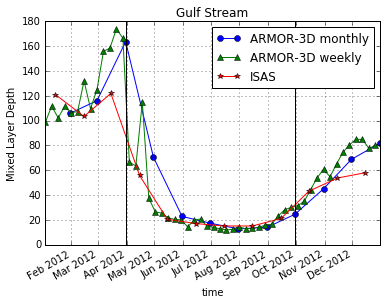

In [4]:
coord = 'gul'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice('01-01-2012', '31-12-2012'))

datm_am = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))
datm_aw = data_a.mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice('01-01-2012', '31-12-2012'))
datm_i = data_i.mean(('longitude', 'latitude'))


#%matplotlib notebook

yrs = [i for i in range(2006,2006,1)]

datm_am.plot.line(label='ARMOR-3D monthly', marker='o')
datm_aw.plot.line(label='ARMOR-3D weekly', marker='^')
datm_i[:,0].plot.line(label='ISAS', marker='*')

plt.axvline(x='31-Mar-2012', color='k')
plt.axvline(x='30-Sep-2012', color='k')

plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper right')
plt.title(name_fig)
plt.grid()
plt.plot(figsize=(15, 7.5))
plt.show()
#plt.savefig(name_fig, bbox_inches='tight')

# Plotting all the years for each region

## Gulf Stream

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 


2006 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


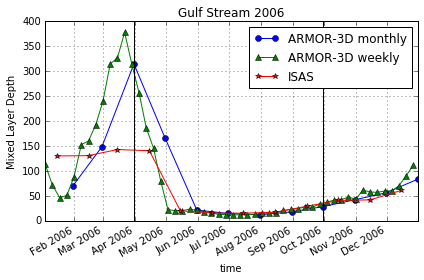

2007 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


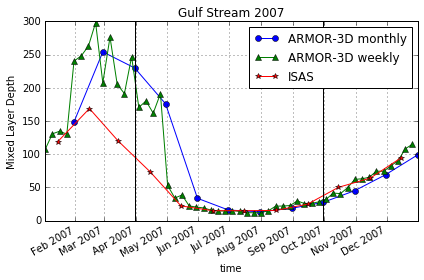

2008 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


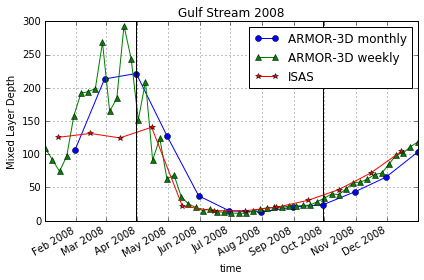

2009 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


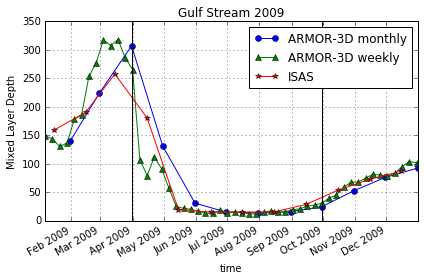

2010 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


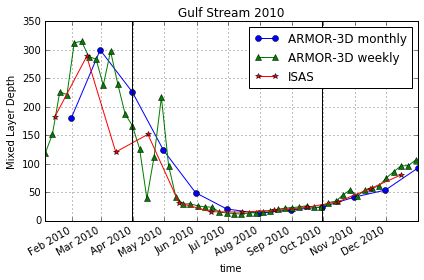

2011 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


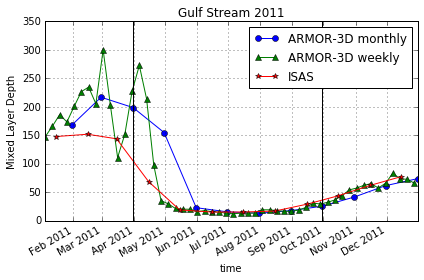

2012 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


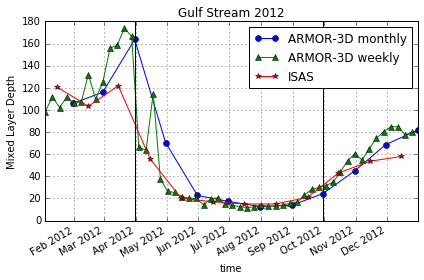

2013 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


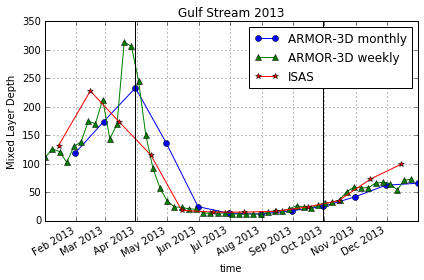

2014 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


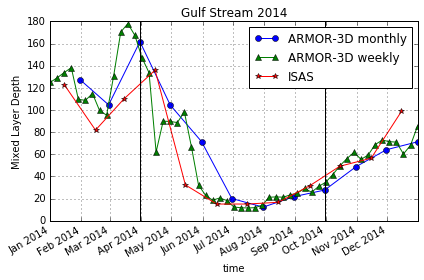

2015 <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()> <xarray.DataArray 'mlotst' ()>
dask.array<shape=(), dtype=float32, chunksize=()>


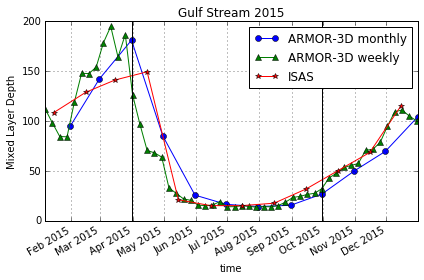

In [5]:
yrs = [i for i in range(2006,2016,1)]

coord = 'gul'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']

for i, y in enumerate(yrs):
    name_fig = regions[coord]['name'] + ' ' + str(y)
    tm1 = '01-01-' + str(y)
    tm2 = '31-12-' + str(y)
    
    mk1 = '31-Mar-' + str(y)
    mk2 = '30-Sep-' + str(y)

    data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))

    datm_am = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))
    datm_aw = data_a.mean(('longitude', 'latitude'))

    data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))
    datm_i = data_i.mean(('longitude', 'latitude'))
    
    max = datm_aw.max()
    min = datm_aw.min()
    print(str(y), min, max)

    datm_am.plot.line(label='ARMOR-3D monthly', marker='o')
    datm_aw.plot.line(label='ARMOR-3D weekly', marker='^')
    datm_i[:,0].plot.line(label='ISAS', marker='*')

    plt.axvline(x=mk1, color='k')
    plt.axvline(x=mk2, color='k')

    plt.ylabel('Mixed Layer Depth')
    plt.legend(loc='upper right')
    plt.title(name_fig)
    plt.grid()
    plt.tight_layout()
    plt.plot(figsize=(15, 7.5))
    plt.show()


#plt.savefig(name_fig, bbox_inches='tight')

<IPython.core.display.Javascript object>


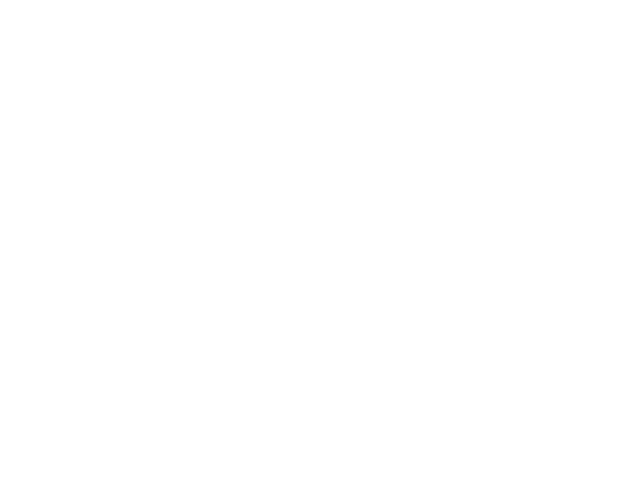

<IPython.core.display.Javascript object>


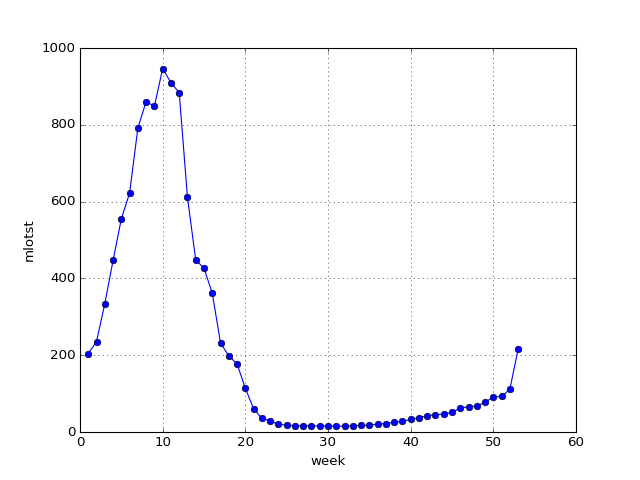

In [19]:
data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_ac = data_a.groupby('time.week').mean(('longitude', 'latitude', 'time'))

plt.clf()

%matplotlib notebook
datm_ac.plot.line(marker='o')
plt.grid()
plt.show()

## Labrador Sea

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 


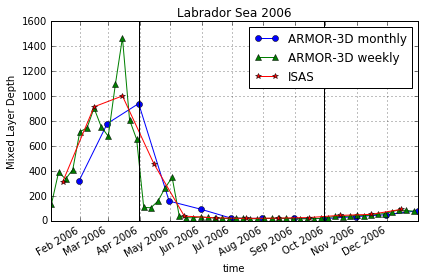

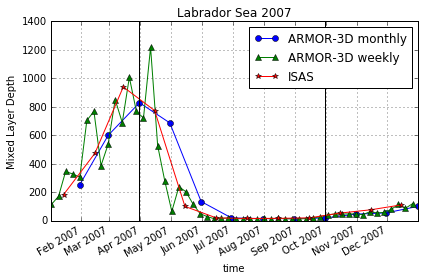

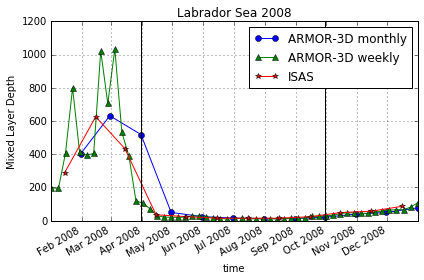

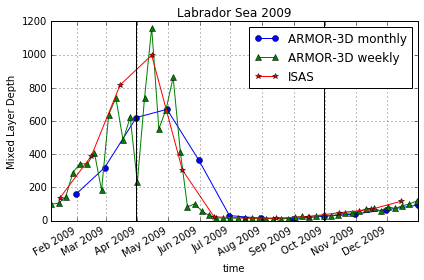

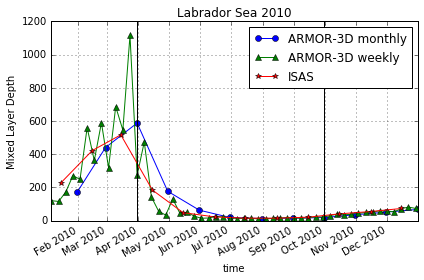

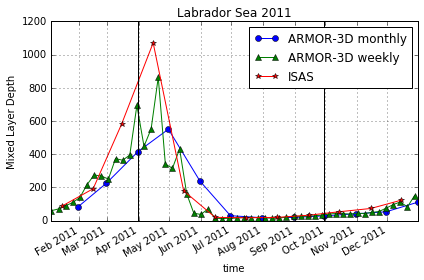

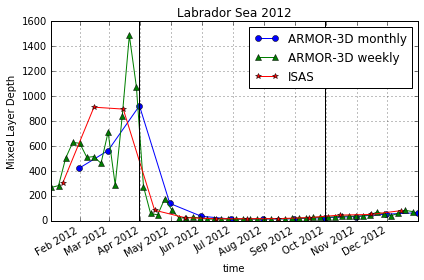

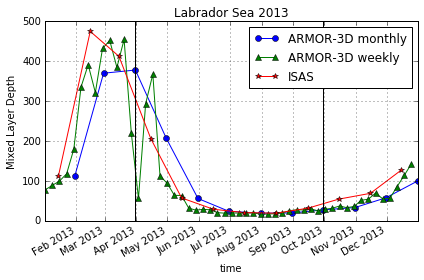

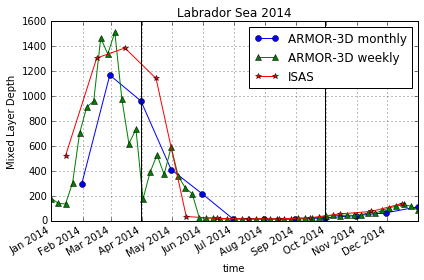

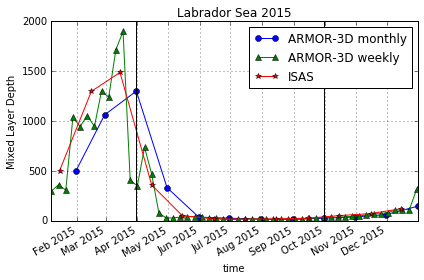

In [21]:
yrs = [i for i in range(2006,2016,1)]

coord = 'lab'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']

%matplotlib inline

for i, y in enumerate(yrs):
    name_fig = regions[coord]['name'] + ' ' + str(y)
    tm1 = '01-01-' + str(y)
    tm2 = '31-12-' + str(y)
    
    mk1 = '31-Mar-' + str(y)
    mk2 = '30-Sep-' + str(y)

    data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))

    datm_am = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))
    datm_aw = data_a.mean(('longitude', 'latitude'))

    data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))
    datm_i = data_i.mean(('longitude', 'latitude'))

    datm_am.plot.line(label='ARMOR-3D monthly', marker='o')
    datm_aw.plot.line(label='ARMOR-3D weekly', marker='^')
    datm_i[:,0].plot.line(label='ISAS', marker='*')

    plt.axvline(x=mk1, color='k')
    plt.axvline(x=mk2, color='k')

    plt.ylabel('Mixed Layer Depth')
    plt.legend(loc='upper right')
    plt.title(name_fig)
    plt.grid()
    plt.tight_layout()
    plt.plot(figsize=(15, 7.5))
    plt.show()


#plt.savefig(name_fig, bbox_inches='tight')

56 59


<IPython.core.display.Javascript object>


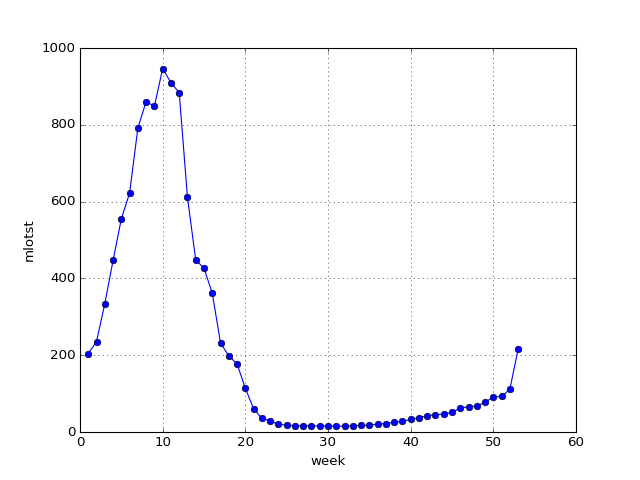

In [22]:
data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_ac = data_a.groupby('time.week').mean(('longitude', 'latitude', 'time'))
plt.clf()

print(lat1, lat2)

%matplotlib notebook
datm_ac.plot.line(marker='o')
plt.grid()
plt.show()

## Irminger Sea

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 


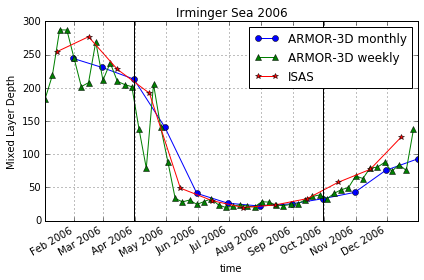

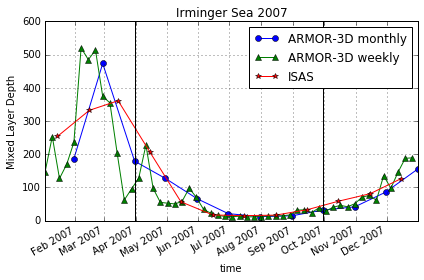

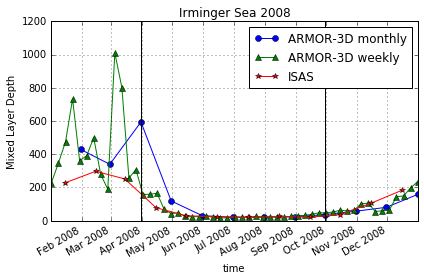

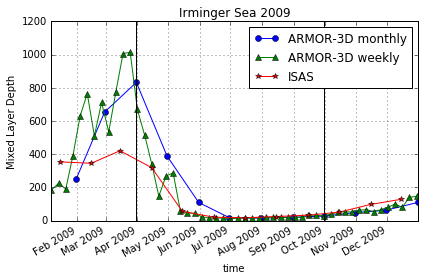

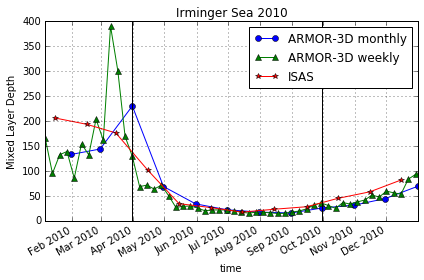

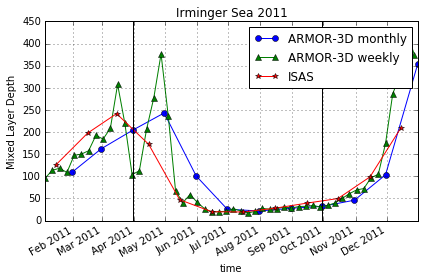

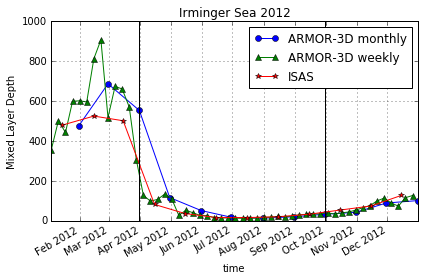

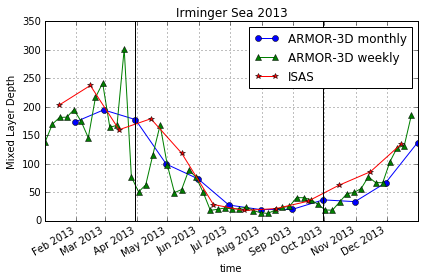

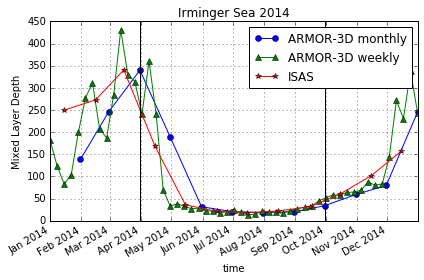

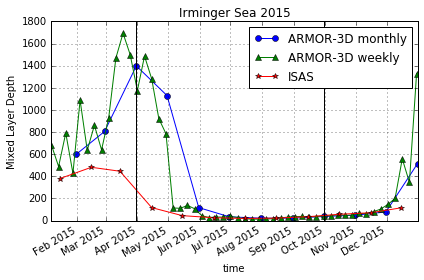

In [23]:
yrs = [i for i in range(2006,2016,1)]

coord = 'irm'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']

%matplotlib inline

for i, y in enumerate(yrs):
    name_fig = regions[coord]['name'] + ' ' + str(y)
    tm1 = '01-01-' + str(y)
    tm2 = '31-12-' + str(y)
    
    mk1 = '31-Mar-' + str(y)
    mk2 = '30-Sep-' + str(y)

    data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))

    datm_am = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))
    datm_aw = data_a.mean(('longitude', 'latitude'))

    data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))
    datm_i = data_i.mean(('longitude', 'latitude'))

    datm_am.plot.line(label='ARMOR-3D monthly', marker='o')
    datm_aw.plot.line(label='ARMOR-3D weekly', marker='^')
    datm_i[:,0].plot.line(label='ISAS', marker='*')

    plt.axvline(x=mk1, color='k')
    plt.axvline(x=mk2, color='k')

    plt.ylabel('Mixed Layer Depth')
    plt.legend(loc='upper right')
    plt.title(name_fig)
    plt.grid()
    plt.tight_layout()
    plt.plot(figsize=(15, 7.5))
    plt.show()


#plt.savefig(name_fig, bbox_inches='tight')

58 61


<IPython.core.display.Javascript object>


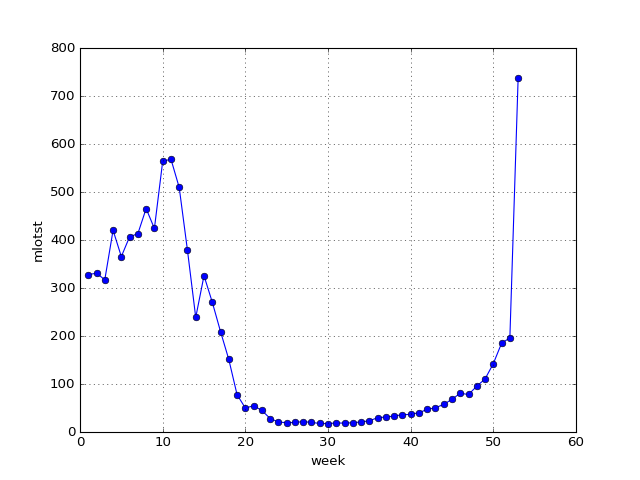

In [24]:
data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_ac = data_a.groupby('time.week').mean(('longitude', 'latitude', 'time'))

%matplotlib notebook

print(lat1, lat2)

datm_ac.plot.line(marker='o')
plt.grid()
plt.show()

## North-East 

In [11]:
yrs = [i for i in range(2006,2016,1)]

coord = 'noe'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']

for i, y in enumerate(yrs):
    name_fig = regions[coord]['name'] + ' ' + str(y)
    tm1 = '01-01-' + str(y)
    tm2 = '31-12-' + str(y)
    
    mk1 = '31-Mar-' + str(y)
    mk2 = '30-Sep-' + str(y)

    data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))

    datm_am = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))
    datm_aw = data_a.mean(('longitude', 'latitude'))
    datm_ac = data_a.groupby('time.week').mean(('longitude', 'latitude', 'time'))

    data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2), time=slice(tm1, tm2))
    datm_i = data_i.mean(('longitude', 'latitude'))

    datm_am.plot.line(label='ARMOR-3D monthly', marker='o')
    datm_aw.plot.line(label='ARMOR-3D weekly', marker='^')
    #datm_ac.plot.line(datm_aw.time, datm_ac, label='climatology', marker='d')
    datm_i[:,0].plot.line(label='ISAS', marker='*')

    plt.axvline(x=mk1, color='k')
    plt.axvline(x=mk2, color='k')

    plt.ylabel('Mixed Layer Depth')
    plt.legend(loc='upper right')
    plt.title(name_fig)
    plt.grid()
    plt.tight_layout()
    plt.plot(figsize=(15, 7.5))
    plt.show()

#plt.savefig(name_fig, bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 


In [12]:
data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_ac = data_a.groupby('time.week').mean(('longitude', 'latitude', 'time'))

print(lat1, lat2)

datm_ac.plot.line(marker='o')

50 53


## Climatology


In [13]:
data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_ac = data_a.groupby('time.week').mean(('longitude', 'latitude', 'time'))


print(datm_ac.variables) 
print(datm_aw)
print(data_a)

datm_aw.plot.line(marker='*')
plt.show()
datm_ac.plot.line(marker='o')


#datm_ac.plot.line(label='ARMOR-3D monthly', marker='o')
#plt.show()


AttributeError: 'DataArray' object has no attribute 'variables'